This program uses an artificial reccurent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price. 

In [19]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')


In [28]:

ticker='AAPL'
start_date='2019-1-1'
yf.pdr_override()
ticker_data=web.get_data_stooq(ticker,start=start_date)
df=pd.DataFrame(ticker_data).sort_values('Date')
df

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,37.3770,38.3281,37.2125,38.1048,1.535046e+08
2019-01-03,34.7431,35.1588,34.2635,34.3094,3.784272e+08
2019-01-04,34.8746,35.8446,34.6991,35.7729,2.428866e+08
2019-01-07,35.8786,35.9104,35.2046,35.6911,2.270168e+08
2019-01-08,36.0899,36.6342,35.8367,36.3711,1.700222e+08
...,...,...,...,...,...
2024-06-14,213.8500,215.1700,211.3000,212.4900,7.012275e+07
2024-06-17,213.3700,218.9500,212.7200,216.6700,9.372830e+07
2024-06-18,217.5900,218.6300,213.0000,214.2900,7.994325e+07


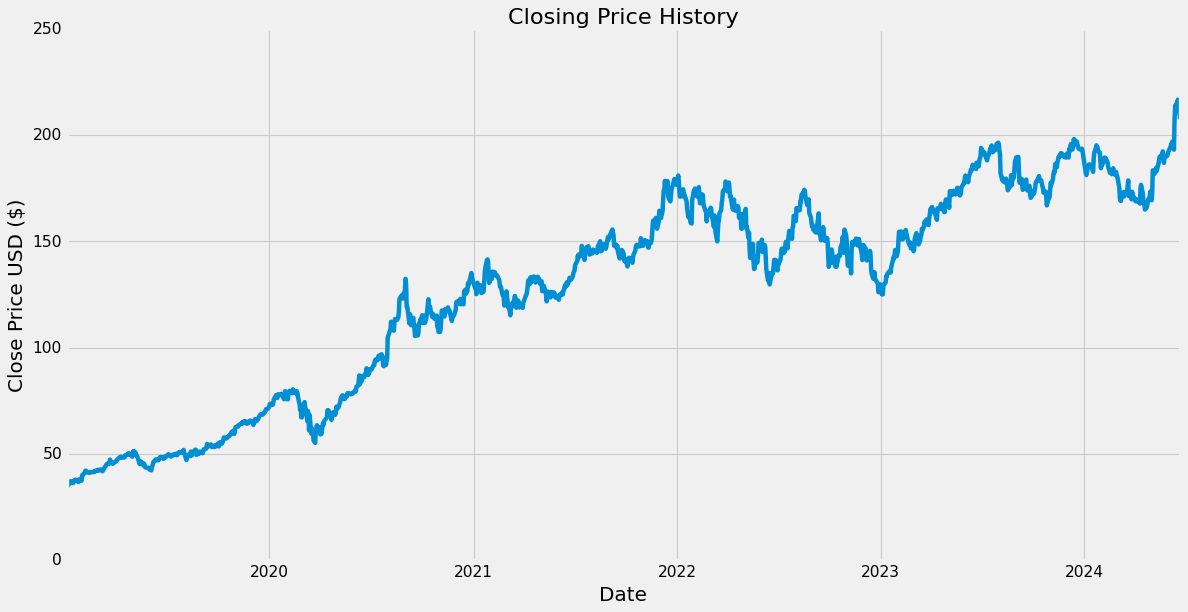

In [29]:
#Visualize the closing price with time
plt.figure(figsize=(16,8))
plt.title("Closing Price History")
plt.plot(df['Close'])
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Close Price USD ($)",fontsize = 18)
plt.show()

In [30]:
#Create a new dataframe with only the close column
data = df.filter(['Close'])
#Convert the data frame to numpy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset)*0.8) # Training about 80% of the data
training_data_len

1102

In [31]:
#Scale the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02081261],
       [0.        ],
       [0.00802531],
       ...,
       [0.98694894],
       [0.96166935],
       [0.94966018]])

In [32]:
#Create the training data set, create the scaled training data set
train_data = scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0]) # will contain 60 values
    y_train.append(train_data[i,0]) # will contain 61st value
    if i <= 61:
        print(x_train)
        print(y_train)
        print()


[array([0.02081261, 0.        , 0.00802531, 0.00757675, 0.01130562,
       0.01470548, 0.01535639, 0.01337186, 0.01035421, 0.01441594,
       0.01688742, 0.01808998, 0.01934738, 0.01469451, 0.01549841,
       0.01390761, 0.02061026, 0.01866357, 0.01653756, 0.03050001,
       0.0320963 , 0.03218897, 0.038465  , 0.04232493, 0.04240719,
       0.0380444 , 0.03831749, 0.03700032, 0.03894098, 0.03800602,
       0.03882582, 0.03833394, 0.03899033, 0.04047146, 0.03916471,
       0.04170747, 0.04337505, 0.04351104, 0.04423269, 0.04195862,
       0.0443643 , 0.04555041, 0.04512378, 0.04375726, 0.04109495,
       0.0416307 , 0.04959076, 0.052275  , 0.05332457, 0.05600881,
       0.05918493, 0.0617107 , 0.05972617, 0.06190263, 0.07108663,
       0.06572911, 0.06268953, 0.06008151, 0.06232322, 0.06266211])]
[0.0642638815621357]

[array([0.02081261, 0.        , 0.00802531, 0.00757675, 0.01130562,
       0.01470548, 0.01535639, 0.01337186, 0.01035421, 0.01441594,
       0.01688742, 0.01808998, 0.019

In [33]:
#Convert the x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train)

In [37]:
#Reshape the data, LSTM expects the data to be 3dimensional: number of samples, number of time steps, number of features
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1042, 60, 1)

In [38]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

/Users/tanmay/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
#Compile the Model
model.compile(optimizer='adam',loss='mean_squared_error')

In [41]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1042/1042 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0070


In [43]:
#Create the testing data set
#Create a new array containing new scaled values from index end of training set to full testing data set
test_data = scaled_data[training_data_len-60:,:]
#Create the data sets x_test, y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [44]:
#Convert the data into scaled values, numpy arrays
x_test = np.array(x_test)

In [46]:
#Reshape it to 3d
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [48]:
#Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [51]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions-y_test)**2))
rmse

7.2201186960393855

/var/folders/ky/h8lwf3_15474bz8t00fhj0_00000gn/T/ipykernel_63608/4098270735.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


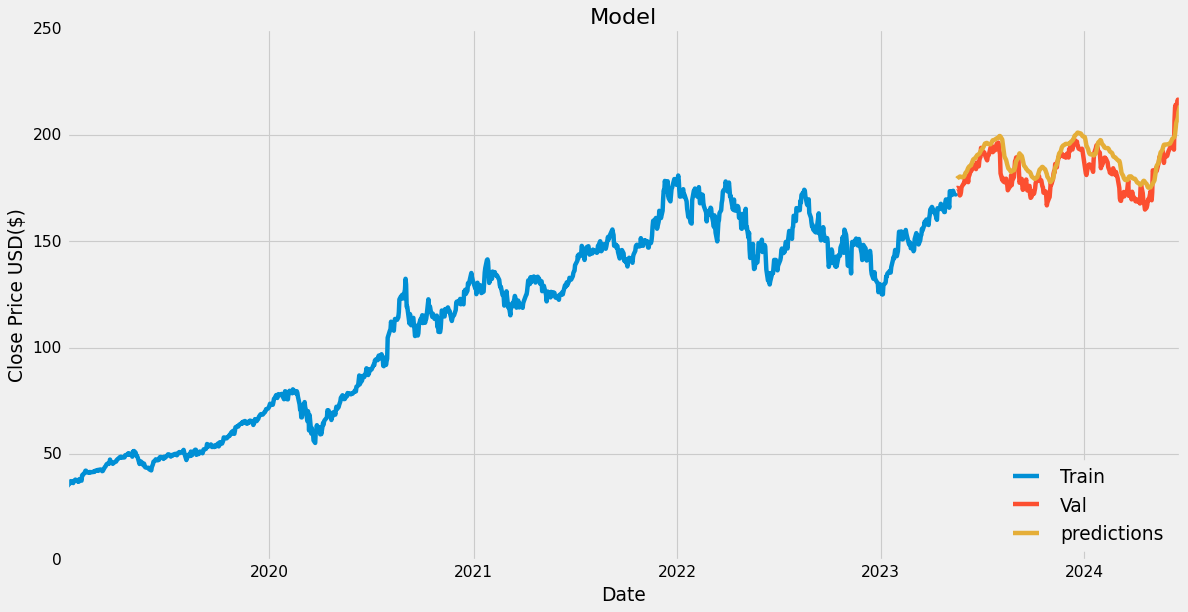

In [53]:
#Plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
#Visualize
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Date')
plt.ylabel('Close Price USD($)')
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'],loc = 'lower right')
plt.show()

In [54]:
valid

,Close,predictions
Date,,
2023-05-18,175.05,179.488617
2023-05-19,175.16,179.802444
2023-05-22,174.20,180.186417
2023-05-23,171.56,180.479767
2023-05-24,171.84,180.446686
...,...,...
2024-06-14,212.49,205.645889
2024-06-17,216.67,208.139099
2024-06-18,214.29,210.664993


In [61]:
# Get the quote
apple_quote = web.get_data_stooq(ticker,start = '2019-01-01', end = '2022-01-20')
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the data frame to an array
last_60_days =  new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the predicted price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[[41.927223]]


In [58]:
apple_quote2 = web.get_data_stooq(ticker,start = '2024-06-20', end = '2024-06-20')
print(apple_quote2['Close'])

Date
2024-06-20    209.68
Name: Close, dtype: float64
